In [504]:
import numpy as np
import pandas as pd

import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [505]:
feedback_df = pd.DataFrame()

# 1 to 58 files

for i in range(1,59):
    
    file_name = str(i)+".csv"    
    file = pd.read_csv(file_name, delimiter=',')
    
    # Conversion of App ID to int     
    file["App ID"] = file["App ID"].fillna(0.0).astype(int)

    # Reset_index 
    file.index = np.arange(0, len(file))
    
    # Dropping Login
    file = file[file.Function != "Login"]
    file.reset_index(drop = True, inplace = True)
    

    # Dropping Repeated Entries
    drop_index = []
    for i in range(1,len(file.index)):
        try:
            if ((file.at[i,"App ID"] == int(file.at[i,"Value"])) and (file.loc[i,"ID"] in file.loc[0:i-1,"ID"].unique()) and (file.loc[i,"App ID"]  in file.loc[0:i-1,"App ID"].unique())):          
                    drop_index.append(i)
        except: 
            continue
    
    file.drop(index = drop_index,inplace = True)
    feedback_df = pd.concat([feedback_df,file],axis=0)
    
feedback_df.drop(columns = "Pattern",inplace = True)
feedback_df.reset_index(drop = True, inplace = True)


In [506]:
# Dropping the entires where function chosen is apply_refine_search which is filtering for attribute 
# but there is no attribute present that was filtered for. 

df_with_null_attribute = feedback_df[feedback_df["Attribute"].isna()]
null_attribute_index = df_with_null_attribute[df_with_null_attribute["Function"] == "apply_refine_search"].index
null_attribute_index

print(len(null_attribute_index))

feedback_df.drop(index = null_attribute_index,inplace = True)

feedback_df.reset_index(drop = True, inplace = True)
feedback_df

71


,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
0,2,2022-12-20 15:12:55.100766,5c48be0496d59b000183e68d,106647,select_applications,None,106647,None,None
1,12,2022-12-20 15:15:51.280650,5c48be0496d59b000183e68d,106647,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
2,14,2022-12-20 15:17:52.604073,5c48be0496d59b000183e68d,104132,select_applications,None,104132,None,None
3,31,2022-12-20 15:21:11.500675,5c48be0496d59b000183e68d,104132,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
4,33,2022-12-20 15:21:58.565981,5c48be0496d59b000183e68d,102854,select_applications,None,102854,None,None
...,...,...,...,...,...,...,...,...,...
4004,454,2022-12-20 15:32:03.751207,612288702a5316519e4e9602,101356,select_reject_application,unfair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0
4005,456,2022-12-20 15:32:45.242468,612288702a5316519e4e9602,100057,select_applications,None,100057,None,None
4006,458,2022-12-20 15:32:57.302196,612288702a5316519e4e9602,100057,select_reject_application,unfair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0
4007,460,2022-12-20 15:33:15.502621,612288702a5316519e4e9602,100065,select_applications,None,100065,None,None


In [513]:
similar_apps_ind = feedback_df[(feedback_df["Function"] == "similar_application") | (feedback_df["Function"] == "select_applications")].index

feedback_df.loc[similar_apps_ind, "Value"] = feedback_df.loc[similar_apps_ind, "Value"].astype(int)
type(feedback_df[feedback_df["Function"] == "similar_application"]["Value"][6])

int

In [514]:
feedback_df.to_csv("Feedback_final.csv")

In [515]:
applications_df = pd.read_csv("C:/Users/user/Desktop/Home Credit Default Riskk/Applications_Converted.csv")
ft_weight_dict = {}

for i in range(0,49):
    ft_weight_dict.update({applications_df["ft_name_"+ str(i)][0]:applications_df["ft_weight_"+ str(i)][0]})

1. Average number of clicks that a user did on a function with std

In [516]:
feedback_df

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
0,2,2022-12-20 15:12:55.100766,5c48be0496d59b000183e68d,106647,select_applications,None,106647,None,None
1,12,2022-12-20 15:15:51.280650,5c48be0496d59b000183e68d,106647,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
2,14,2022-12-20 15:17:52.604073,5c48be0496d59b000183e68d,104132,select_applications,None,104132,None,None
3,31,2022-12-20 15:21:11.500675,5c48be0496d59b000183e68d,104132,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
4,33,2022-12-20 15:21:58.565981,5c48be0496d59b000183e68d,102854,select_applications,None,102854,None,None
...,...,...,...,...,...,...,...,...,...
4004,454,2022-12-20 15:32:03.751207,612288702a5316519e4e9602,101356,select_reject_application,unfair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0
4005,456,2022-12-20 15:32:45.242468,612288702a5316519e4e9602,100057,select_applications,None,100057,None,None
4006,458,2022-12-20 15:32:57.302196,612288702a5316519e4e9602,100057,select_reject_application,unfair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0
4007,460,2022-12-20 15:33:15.502621,612288702a5316519e4e9602,100065,select_applications,None,100065,None,None


In [517]:
function_group = feedback_df.groupby(by = ["ID","Function"])

function_count = function_group.size().unstack(fill_value=0).stack()

parti_list = []
function_list = []
function_count_list = function_count.tolist()

# print(len(function_count_list))

for i in range(0,len(function_count.index)):
    parti_list.append(function_count.index[i][0])
    function_list.append(function_count.index[i][1])

parti_func_df = pd.DataFrame()

parti_func_df["Participant"] = parti_list
parti_func_df["Function"] = function_list
parti_func_df["Participant_Function_Count"] = function_count_list
parti_func_df

,Participant,Function,Participant_Function_Count
0,5952a5175071bb0001ce96c7,Applications_Prediction_Confidence,2
1,5952a5175071bb0001ce96c7,Click on Feature Combination Button,2
2,5952a5175071bb0001ce96c7,Clicked-on-Causal-Graph-Node,0
3,5952a5175071bb0001ce96c7,apply_refine_search,8
4,5952a5175071bb0001ce96c7,select_applications,12
...,...,...,...
401,6229dc51dff340226697778e,Clicked-on-Causal-Graph-Node,2
402,6229dc51dff340226697778e,apply_refine_search,12
403,6229dc51dff340226697778e,select_applications,9
404,6229dc51dff340226697778e,select_reject_application,4


In [521]:
data = []

for func in parti_func_df["Function"].unique():
    
    data.append(
    {
        "Function" : func,
        "Total" : parti_func_df[parti_func_df["Function"]== func ].Participant_Function_Count.sum(),
        "Mean": round(parti_func_df[parti_func_df["Function"]== func ].Participant_Function_Count.mean(),2),
        "Std": round(parti_func_df[parti_func_df["Function"]== func ].Participant_Function_Count.std(),2),"Number of Participants Clicked" : parti_func_df[(parti_func_df["Function"]== func) & (parti_func_df["Participant_Function_Count"] != 0)].shape[0]
    }
    )
    
each_function_df = pd.DataFrame(data)
each_function_df.sort_values(by='Total', ascending=False, inplace = True)
each_function_df.reset_index(drop = True, inplace = True)
each_function_df


each_function_df.replace({'Function' : { "select_applications" :'Select an application', "select_reject_application" : 'Give rating and weight (if desired)',
                                        "apply_refine_search":"Filter for an attribute","Click on Feature Combination Button":"Select Feature Combination",
                                       "Applications_Prediction_Confidence": "Sort for prediction confidence", "similar_application": "View Similar applications",
                                       "Clicked-on-Causal-Graph-Node": "Select Causal Graph Node"}},inplace=True)

each_function_df

,Function,Total,Mean,Std,Number of Participants Clicked
0,Give rating and weight (if desired),1609,27.74,23.47,58
1,Select an application,1602,27.62,22.44,58
2,Filter for an attribute,238,4.10,6.24,44
3,Select Feature Combination,192,3.31,14.41,36
4,Sort for prediction confidence,179,3.09,7.58,26
5,Select Causal Graph Node,141,2.43,11.25,16
6,View Similar applications,48,0.83,1.60,19


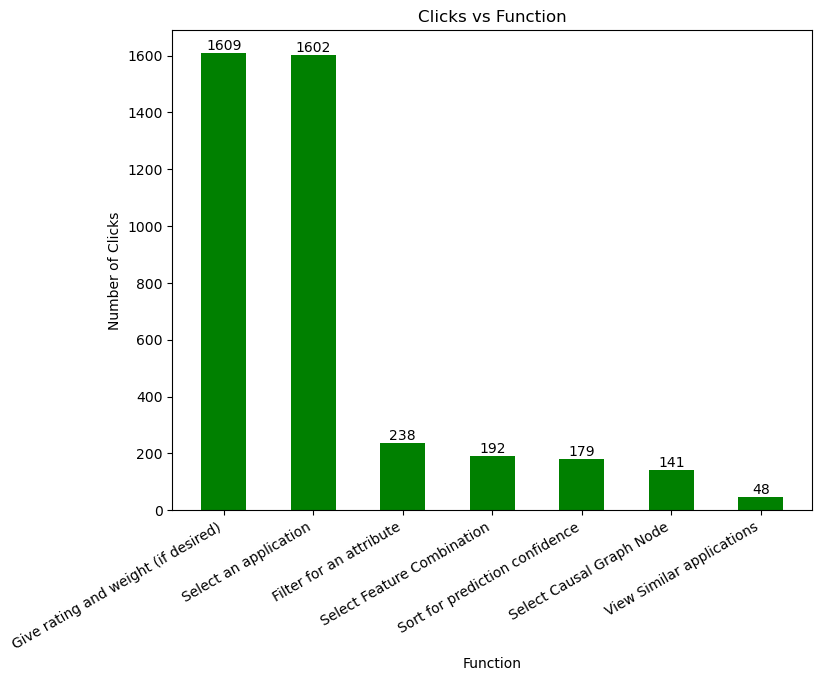

In [522]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


bars = ax.bar(each_function_df["Function"],each_function_df["Total"], width=0.5, color = "green")
ax.bar_label(bars)
plt.title("Clicks vs Function")
plt.xlabel('Function')
plt.ylabel('Number of Clicks')
fig.autofmt_xdate()
plt.show()

How many times each application was viewed w.r.t each user

In [523]:
feedback_df[feedback_df["Function"] == "select_applications"]

display(feedback_df[feedback_df["Function"] == "select_applications"].head())
print(feedback_df[feedback_df["Function"] == "select_applications"]["ID"].nunique())

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
0,2,2022-12-20 15:12:55.100766,5c48be0496d59b000183e68d,106647,select_applications,None,106647,None,None
2,14,2022-12-20 15:17:52.604073,5c48be0496d59b000183e68d,104132,select_applications,None,104132,None,None
4,33,2022-12-20 15:21:58.565981,5c48be0496d59b000183e68d,102854,select_applications,None,102854,None,None
7,57,2022-12-20 15:26:27.678311,5c48be0496d59b000183e68d,100150,select_applications,None,100150,None,None
8,58,2022-12-20 15:27:45.754083,5c48be0496d59b000183e68d,100038,select_applications,None,100038,None,None


58


In [524]:
app_group = feedback_df[feedback_df["Function"] == "select_applications"].groupby(by = ["ID","App ID"])

app_count = app_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(app_count.index)):
    
    data.append(
    {
        "Participant" : app_count.index[i][0],
        "App ID" : app_count.index[i][1],
        "Count": app_count.values[i]
    }
    )
    
parti_app_df = pd.DataFrame(data)
parti_app_df

,Participant,App ID,Count
0,5952a5175071bb0001ce96c7,100001,1
1,5952a5175071bb0001ce96c7,100005,0
2,5952a5175071bb0001ce96c7,100013,0
3,5952a5175071bb0001ce96c7,100028,0
4,5952a5175071bb0001ce96c7,100038,1
...,...,...,...
17105,6229dc51dff340226697778e,106810,0
17106,6229dc51dff340226697778e,106822,0
17107,6229dc51dff340226697778e,106823,0
17108,6229dc51dff340226697778e,106853,0


In [525]:
data = []

for app_id in parti_app_df["App ID"].unique():
    
    data.append(
    {
        "Application" : app_id,
        "Total" : parti_app_df[parti_app_df["App ID"]== app_id ].Count.sum(),
        "Mean": round(parti_app_df[parti_app_df["App ID"]== app_id ].Count.mean(),2),
        "Std": round(parti_app_df[parti_app_df["App ID"]== app_id ].Count.std(),2),
        "Number of Participants Viewed" : parti_app_df[(parti_app_df["App ID"]== app_id) & (parti_app_df["Count"] != 0)].shape[0]
    }
    )
    
each_app_df = pd.DataFrame(data)
each_app_df

each_app_df.sort_values(by='Total', ascending=False, inplace = True)
each_app_df.fillna("NA", inplace = True)
each_app_df.reset_index(drop = True, inplace = True)

df = applications_df[["Application_id","Predicted_decision", "Prediction_Confidence_Accepted" ]]
df = df.T
df.rename(columns=df.iloc[0],inplace =True)

each_app_df_final = each_app_df.T
each_app_df_final.rename(columns=each_app_df_final.iloc[0],inplace =True)

for column in each_app_df_final.columns:
    
    each_app_df_final.loc["Predicted_decision",column] =  df[column]["Predicted_decision"]
    each_app_df_final.loc["Prediction_Confidence_Accepted",column] =  df[column]["Prediction_Confidence_Accepted"]
    


each_app_df_final = each_app_df_final.T
each_app_df_final.reset_index(drop = True, inplace = True)

each_app_df_final

#each_app_df_final.to_csv("How many times each application was viewed w.r.t each user.csv")

,Application,Total,Mean,Std,Number of Participants Viewed,Predicted_decision,Prediction_Confidence_Accepted
0,106647.0,55.0,0.95,0.22,55.0,Rejected,10.041
1,106401.0,47.0,0.81,0.4,47.0,Rejected,11.67
2,101367.0,39.0,0.67,0.47,39.0,Rejected,14.826
3,106488.0,37.0,0.64,0.48,37.0,Rejected,13.043
4,100241.0,37.0,0.64,0.48,37.0,Rejected,15.896
...,...,...,...,...,...,...,...
290,103624.0,1.0,0.02,0.13,1.0,Accepted,72.842
291,103572.0,1.0,0.02,0.13,1.0,Rejected,31.588
292,101259.0,1.0,0.02,0.13,1.0,Rejected,41.034
293,101287.0,1.0,0.02,0.13,1.0,Rejected,34.45


Which attribute was most filtered for w.r.t each participant

In [526]:
feedback_df[feedback_df["Function"] == "apply_refine_search"]

display(feedback_df[feedback_df["Function"] == "apply_refine_search"].head())
print(feedback_df[feedback_df["Function"] == "apply_refine_search"]["ID"].nunique())

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
15,11,2022-12-20 14:42:49.160836,5c83f171fff8430001e997b4,0,apply_refine_search,Age,NaN,NaN,NaN
188,70,2022-12-20 14:48:07.739329,5d1f440b3aac9200019067f1,0,apply_refine_search,Gender,NaN,NaN,NaN
247,2,2022-12-20 14:38:09.711163,5d66a40c141c9800016a08a2,0,apply_refine_search,Gender,NaN,NaN,NaN
249,4,2022-12-20 14:39:36.990112,5d66a40c141c9800016a08a2,0,apply_refine_search,Goods Price,NaN,NaN,NaN
457,482,2022-12-20 14:56:42.720838,5d66a40c141c9800016a08a2,0,apply_refine_search,Accompanied while applying,NaN,NaN,NaN


44


In [527]:
attribute_group = feedback_df.groupby(by = ["ID","Attribute"])

attribute_count = attribute_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(attribute_count.index)):
    
    if attribute_count.index[i][1] in list(ft_weight_dict.keys()):

        data.append(
        {
            "Participant" : attribute_count.index[i][0],
            "Attribute" : attribute_count.index[i][1],
            "Count": attribute_count.values[i]
        }
        )
    
parti_attri_df = pd.DataFrame(data)
parti_attri_df

,Participant,Attribute,Count
0,5952a5175071bb0001ce96c7,Accompanied while applying,0
1,5952a5175071bb0001ce96c7,Age,2
2,5952a5175071bb0001ce96c7,Application Day,0
3,5952a5175071bb0001ce96c7,Application Hour,0
4,5952a5175071bb0001ce96c7,Contact address located in Registration region,0
...,...,...,...
2199,6229dc51dff340226697778e,Region & City Rating,0
2200,6229dc51dff340226697778e,Region's Normalized Population,0
2201,6229dc51dff340226697778e,Region's Rating,0
2202,6229dc51dff340226697778e,Years in current employment,0


In [528]:
data = []

for attribute in list(ft_weight_dict.keys()):
    
    data.append(
    {
        "Attribute" : attribute,
        "Total" : parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.sum(),
        "Mean": round(parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.mean(),2),
        "Std": round(parti_attri_df[parti_attri_df["Attribute"]== attribute ].Count.std(),2),
        "Number of Participants Filtered" : parti_attri_df[(parti_attri_df["Attribute"]== attribute) & (parti_attri_df["Count"] != 0)].shape[0]
    }
    )
    
each_attri_df = pd.DataFrame(data)
each_attri_df

each_attri_df.sort_values(by='Total', ascending=False, inplace = True)
each_attri_df.fillna("NA", inplace = True)
each_attri_df.reset_index(drop = True, inplace = True)
each_attri_df
# each_attri_df.to_csv("Attribute was most filtered for w.r.t each participant.csv")

,Attribute,Total,Mean,Std,Number of Participants Filtered
0,Age,42,0.72,1.12,26
1,Income,30,0.52,1.47,14
2,Gender,18,0.31,0.68,14
3,Accompanied while applying,15,0.26,0.71,9
4,Owns Car,14,0.24,0.6,10
5,Owns Property,14,0.24,0.86,5
6,Occupation Type,10,0.17,0.63,6
7,Application Day,8,0.14,0.48,6
8,Years in current employment,6,0.1,0.55,3
9,Income type,6,0.1,0.48,3


Which Feature Combinations were most seen w.r.t Participant

In [531]:
feedback_df[feedback_df["Function"] == "Click on Feature Combination Button"]

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
12,84,2022-12-20 15:32:12.364961,5c48be0496d59b000183e68d,0,Click on Feature Combination Button,None,"{'attribute': 'Installments', 'value': 'Fixed'...",None,None
22,62,2022-12-20 14:48:26.971518,5c83f171fff8430001e997b4,0,Click on Feature Combination Button,None,"{'attribute': 'Installments', 'value': 'Fixed'...",None,None
23,63,2022-12-20 14:48:31.530002,5c83f171fff8430001e997b4,0,Click on Feature Combination Button,None,"{'attribute': 'Installments', 'value': 'Fixed'...",None,None
182,59,2022-12-20 14:47:06.714167,5d1f440b3aac9200019067f1,0,Click on Feature Combination Button,None,"{'attribute': 'Installments', 'value': 'Fixed'...",None,None
458,483,2022-12-20 14:57:02.062920,5d66a40c141c9800016a08a2,0,Click on Feature Combination Button,None,"{'attribute': 'Installments', 'value': 'Fixed'...",None,None
...,...,...,...,...,...,...,...,...,...
3767,95,2022-12-20 15:33:06.277732,61687ebcd2a35ffb762d1928,0,Click on Feature Combination Button,None,"{'attribute': 'Installments', 'value': 'Fixed'...",None,None
3768,96,2022-12-20 15:33:13.822060,61687ebcd2a35ffb762d1928,0,Click on Feature Combination Button,None,"{'attribute': 'Installments', 'value': 'Fixed'...",None,None
3836,11,2022-12-20 14:42:07.732254,61065060bc55a8b70bc64d05,0,Click on Feature Combination Button,None,"{'attribute': 'Installments', 'value': 'Fixed'...",None,None
3837,12,2022-12-20 14:42:11.036230,61065060bc55a8b70bc64d05,0,Click on Feature Combination Button,None,"{'attribute': 'Installments', 'value': 'Fixed'...",None,None


In [540]:
fc_group= feedback_df.groupby(by = ["ID","Value"])

fc_count = fc_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(fc_count.index)):
    
    if fc_count.index[i][1] in feedback_df[feedback_df["Function"] == "Click on Feature Combination Button"]["Value"].unique().tolist(): 
    
        data.append(
        {
            "Participant" : fc_count.index[i][0],
            "F.C" : fc_count.index[i][1],
            "Count": fc_count.values[i]
        }
        )
    
parti_fc_df = pd.DataFrame(data)
parti_fc_df

,Participant,F.C,Count
0,5952a5175071bb0001ce96c7,"{'attribute': 'Installments', 'value': 'Fixed'...",0
1,5952a5175071bb0001ce96c7,"{'attribute': 'Installments', 'value': 'Fixed'...",0
2,5952a5175071bb0001ce96c7,"{'attribute': 'Installments', 'value': 'Fixed'...",0
3,5952a5175071bb0001ce96c7,"{'attribute': 'Installments', 'value': 'Fixed'...",0
4,5952a5175071bb0001ce96c7,"{'attribute': 'Installments', 'value': 'Fixed'...",0
...,...,...,...
3823,6229dc51dff340226697778e,"{'attribute': 'Installments', 'value': 'Fixed'...",0
3824,6229dc51dff340226697778e,"{'attribute': 'Installments', 'value': 'Fixed'...",0
3825,6229dc51dff340226697778e,"{'attribute': 'Installments', 'value': 'Fixed'...",0
3826,6229dc51dff340226697778e,"{'attribute': 'Installments', 'value': 'Fixed'...",0


In [542]:
data = []

for fc in feedback_df[feedback_df["Function"] == "Click on Feature Combination Button"]["Value"].unique():
    
    data.append(
    {
        "Feature Combination" : fc,
        "Total" : parti_fc_df[parti_fc_df["F.C"]== fc ].Count.sum(),
        "Mean": round(parti_fc_df[parti_fc_df["F.C"]== fc ].Count.mean(),2),
        "Std": round(parti_fc_df[parti_fc_df["F.C"]== fc ].Count.std(),2),
        "Number of Participants Clicked" : parti_fc_df[(parti_fc_df["F.C"]== fc) & (parti_fc_df["Count"] != 0)].shape[0]
    }
    )
    
each_fc_df = pd.DataFrame(data)
each_fc_df

each_fc_df.sort_values(by='Total', ascending=False, inplace = True)
each_fc_df.fillna("NA", inplace = True)
each_fc_df.reset_index(drop = True, inplace = True)
each_fc_df
# each_fc_df.to_csv("Feature Combinations most seen.csv")

,Feature Combination,Total,Mean,Std,Number of Participants Clicked
0,"{'attribute': 'Installments', 'value': 'Fixed'...",27,0.47,0.78,20
1,"{'attribute': 'Installments', 'value': 'Fixed'...",12,0.21,0.45,11
2,"{'attribute': 'Installments', 'value': 'Fixed'...",11,0.19,0.83,6
3,"{'attribute': 'Installments', 'value': 'Fixed'...",11,0.19,0.76,5
4,"{'attribute': 'Installments', 'value': 'Fixed'...",8,0.14,0.51,5
...,...,...,...,...,...
61,"{'attribute': 'Installments', 'value': 'Fixed'...",1,0.02,0.13,1
62,"{'attribute': 'Installments', 'value': 'Fixed'...",1,0.02,0.13,1
63,"{'attribute': 'Installments', 'value': 'Fixed'...",1,0.02,0.13,1
64,"{'attribute': 'Installments', 'value': 'Fixed'...",1,0.02,0.13,1


Which two application combination was the most seen w.r.t to each user

In [294]:
feedback_df[feedback_df["Function"] == "similar_application"].head()

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
6,56,2022-12-20 15:26:15.662973,5c48be0496d59b000183e68d,100001,similar_application,NaN,100792,NaN,NaN
916,25,2022-12-20 14:45:40.555992,5ebed23204aa470f9e1299bb,100001,similar_application,NaN,104943,NaN,NaN
917,26,2022-12-20 14:45:46.975731,5ebed23204aa470f9e1299bb,100001,similar_application,NaN,105345,NaN,NaN
918,27,2022-12-20 14:46:01.905831,5ebed23204aa470f9e1299bb,100001,similar_application,NaN,103762,NaN,NaN
1004,69,2022-12-20 15:03:57.746426,5eee30178ad8d20a8354fbac,100001,similar_application,NaN,106217,NaN,NaN


In [336]:
similar_app_group= feedback_df.groupby(by = ["ID","App ID","Value"])

similar_app_count = similar_app_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(similar_app_count.index)):
    
    if ((similar_app_count.index[i][1]) != 0 and (type(similar_app_count.index[i][2]) == int)) :
        data.append(
        {
            "Participant" : similar_app_count.index[i][0],
            "Application_Combination" : (similar_app_count.index[i][1],similar_app_count.index[i][2]),
            "Count": similar_app_count.values[i]
        }
        )
    
parti_similar_df = pd.DataFrame(data)
parti_similar_df.head()

,Participant,Application_Combination,Count
0,5952a5175071bb0001ce96c7,"(100001, 100792)",0
1,5952a5175071bb0001ce96c7,"(100001, 101211)",0
2,5952a5175071bb0001ce96c7,"(100001, 101667)",0
3,5952a5175071bb0001ce96c7,"(100001, 101697)",0
4,5952a5175071bb0001ce96c7,"(100001, 102052)",0


In [338]:
parti_similar_df["Application_Combination"].unique()

array([(100001, 100792), (100001, 101211), (100001, 101667), ...,
       (106053, 106647), (106053, 106817), (106053, 106854)], dtype=object)

In [339]:
data = []

for combi in parti_similar_df["Application_Combination"].unique():
    
    data.append(
    {
        "Application Combination" : combi,
        "Total" : parti_similar_df[parti_similar_df["Application_Combination"]== combi ].Count.sum(),
        "Mean": round(parti_similar_df[parti_similar_df["Application_Combination"]== combi ].Count.mean(),2),
        "Std": round(parti_similar_df[parti_similar_df["Application_Combination"]== combi ].Count.std(),2),
       "Number of Participants Clicked" : parti_similar_df[(parti_similar_df["Application_Combination"]== combi) & (parti_similar_df["Count"] != 0)].shape[0]
    }
    )
    
each_similar_df = pd.DataFrame(data)

each_similar_df.sort_values(by='Total', ascending=False, inplace = True)
each_similar_df.fillna("NA", inplace = True)
each_similar_df.reset_index(drop = True, inplace = True)
each_similar_df
#each_similar_df.to_csv("Application combination most seen w.r.t to each user.csv")

,Application Combination,Total,Mean,Std,Number of Participants Clicked
0,"(100001, 102701)",5,0.14,0.82,1
1,"(100001, 102927)",4,0.11,0.66,1
2,"(100001, 106854)",3,0.08,0.49,1
3,"(100001, 105041)",2,0.05,0.23,2
4,"(100001, 104772)",2,0.05,0.23,2
...,...,...,...,...,...
10320,"(105760, 106817)",0,0.00,0.0,0
10321,"(105760, 106854)",0,0.00,0.0,0
10322,"(105802, 100792)",0,0.00,0.0,0
10323,"(105802, 101211)",0,0.00,0.0,0


In [343]:
each_similar_df.to_csv("Application combination most seen w.r.t to each user.csv")

In [344]:
a = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
np.mean(a)

0.02

Selected attribute in Causal graph w.r.t User 

In [543]:
feedback_df[feedback_df["Function"] == "Clicked-on-Causal-Graph-Node"].head()

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
464,4,2022-12-20 16:39:17.881816,5d66f23706e589000157e7ec,0,Clicked-on-Causal-Graph-Node,Node Value,Contact address located in work region,None,None
490,185,2022-12-20 16:57:22.242087,5d66f23706e589000157e7ec,0,Clicked-on-Causal-Graph-Node,Node Value,Number of family members,None,None
491,186,2022-12-20 16:57:26.089360,5d66f23706e589000157e7ec,0,Clicked-on-Causal-Graph-Node,Node Value,Age,None,None
492,187,2022-12-20 16:57:26.092982,5d66f23706e589000157e7ec,0,Clicked-on-Causal-Graph-Node,Node Value,Age,None,None
493,188,2022-12-20 16:57:26.096905,5d66f23706e589000157e7ec,0,Clicked-on-Causal-Graph-Node,Node Value,Age,None,None


In [565]:
causal_group= feedback_df.groupby(by = ["ID","Value"])

causal_count = causal_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(causal_count.index)):
        
        data.append(
        {
            "Participant" : causal_count.index[i][0],
            "Graph_Node" : causal_count.index[i][1],
            "Count": causal_count.values[i]
        }
        )
    
parti_causal_df = pd.DataFrame(data)
parti_causal_df.head()

,Participant,Graph_Node,Count
0,5952a5175071bb0001ce96c7,100001,1
1,5952a5175071bb0001ce96c7,100005,0
2,5952a5175071bb0001ce96c7,100013,0
3,5952a5175071bb0001ce96c7,100028,0
4,5952a5175071bb0001ce96c7,100038,1


In [569]:
data = []

for node in list(ft_weight_dict.keys()):
    
    data.append(
    {
        "Causal Graph Node" : node,
        "Total" : parti_causal_df[parti_causal_df["Graph_Node"]== node ].Count.sum(),
        "Mean": round(parti_causal_df[parti_causal_df["Graph_Node"]== node ].Count.mean(),2),
        "Std": round(parti_causal_df[parti_causal_df["Graph_Node"]== node ].Count.std(),2),
        "Number of Participants Clicked" : parti_causal_df[(parti_causal_df["Graph_Node"]== node) & (parti_causal_df["Count"] != 0)].shape[0]
    }
    )
    
each_node_df = pd.DataFrame(data)

each_node_df.sort_values(by='Total', ascending=False, inplace = True)
each_node_df.fillna("NA", inplace = True)
each_node_df.reset_index(drop = True, inplace = True)
each_node_df
# each_node_df.to_csv("Selected attribute in Causal graph w.r.t User.csv")

,Causal Graph Node,Total,Mean,Std,Number of Participants Clicked
0,Number of family members,23,0.4,2.38,5
1,Installments,22,0.38,2.03,4
2,Number of times social circle defaulted on loa...,13,0.22,1.71,1
3,Loan Credit amount,12,0.21,1.45,2
4,Application Hour,12,0.21,1.12,3
5,Housing situation,9,0.16,1.18,1
6,Number of times social circle at default risk ...,7,0.12,0.92,1
7,Years since changing registration,6,0.1,0.67,2
8,Occupation Type,5,0.09,0.66,1
9,Application Day,4,0.07,0.41,2


Applications_Prediction_Confidence : Ascended or Descended w.r.t each User

In [573]:
feedback_df[feedback_df["Function"] == "Applications_Prediction_Confidence"].head()

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
248,3,2022-12-20 14:38:47.263598,5d66a40c141c9800016a08a2,0,Applications_Prediction_Confidence,None,ascend,NaN,NaN
523,92,2022-12-20 15:23:41.894998,5e8a39059d97d006d0bd8439,0,Applications_Prediction_Confidence,None,ascend,NaN,NaN
524,93,2022-12-20 15:23:43.677703,5e8a39059d97d006d0bd8439,0,Applications_Prediction_Confidence,None,ascend,NaN,NaN
525,94,2022-12-20 15:23:44.644716,5e8a39059d97d006d0bd8439,0,Applications_Prediction_Confidence,None,ascend,NaN,NaN
544,156,2022-12-20 15:28:28.853064,5e8a39059d97d006d0bd8439,0,Applications_Prediction_Confidence,None,ascend,NaN,NaN


In [574]:
pc_group= feedback_df.groupby(by = ["ID","Value"])

pc_count = pc_group.size().unstack(fill_value=0).stack()

data = []

for i in range(0,len(pc_count.index)):
    
    data.append(
    {
        "Participant" : pc_count.index[i][0],
        "PC_Value" : pc_count.index[i][1],
        "Count": pc_count.values[i]
    }
    )
    
parti_pc_df = pd.DataFrame(data)
parti_pc_df.head()

,Participant,PC_Value,Count
0,5952a5175071bb0001ce96c7,100001,1
1,5952a5175071bb0001ce96c7,100005,0
2,5952a5175071bb0001ce96c7,100013,0
3,5952a5175071bb0001ce96c7,100028,0
4,5952a5175071bb0001ce96c7,100038,1


In [577]:
data = []

for pc_action in feedback_df[feedback_df["Function"] == "Applications_Prediction_Confidence"]["Value"].unique():
    
    data.append(
    {
        "PC_Value" : pc_action,
        "Total" : parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.sum(),
        "Mean": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.mean(),2),
        "Std": round(parti_pc_df[parti_pc_df["PC_Value"]== pc_action ].Count.std(),2),
        "Number of Participants Clicked" : parti_pc_df[(parti_pc_df["PC_Value"]== pc_action) & (parti_pc_df["Count"] != 0)].shape[0]
    }
    )
    
each_pc_df = pd.DataFrame(data)

each_pc_df.sort_values(by='Total', ascending=False, inplace = True)
each_pc_df.fillna("NA", inplace = True)
each_pc_df.reset_index(drop = True, inplace = True)
display(each_pc_df)

# each_pc_df.loc[0,"Mean"] = round(np.mean(ascend_list),2)
# each_pc_df.loc[0,"Std"] = round(np.std(ascend_list),2)

# each_pc_df.loc[1,"Mean"] = round(np.mean(descend_list),2)
# each_pc_df.loc[1,"Std"] = round(np.std(descend_list),2)

# each_pc_df
# each_pc_df.to_csv("Applications_Prediction_Confidence_Ascended or Descended w.r.t each User.csv")

,PC_Value,Total,Mean,Std,Number of Participants Clicked
0,ascend,150,2.59,6.85,26
1,descend,29,0.50,1.59,7


How many applications were rated as fair/unfair w.r.t to each participant

In [581]:
rating_group= feedback_df[feedback_df["Function"] == "select_reject_application"].groupby(by = ["ID","Attribute"])

rating_count = rating_group.size().unstack(fill_value=0).stack()


data = []

for i in range(0,len(rating_count.index)):
    
    data.append(
    {
        "Participant" : rating_count.index[i][0],
        "Rating" : rating_count.index[i][1],
        "Count": rating_count.values[i]
    }
    )
    
parti_rating_df = pd.DataFrame(data)
parti_rating_df.head(5)

,Participant,Rating,Count
0,5952a5175071bb0001ce96c7,fair,8
1,5952a5175071bb0001ce96c7,unfair,4
2,59cbe23a916c4d0001094710,fair,38
3,59cbe23a916c4d0001094710,unfair,21
4,5c48be0496d59b000183e68d,fair,5


In [582]:
data = []

for rating in parti_rating_df["Rating"].unique():
    
    data.append(
    {
        "Rating" : rating,
        "Total" : parti_rating_df[parti_rating_df["Rating"]== rating ].Count.sum(),
        "Mean": round(parti_rating_df[parti_rating_df["Rating"]== rating ].Count.mean(),2),
        "Std": round(parti_rating_df[parti_rating_df["Rating"]== rating ].Count.std(),2),
        "Number of Participants Clicked" : parti_rating_df[(parti_rating_df["Rating"]== rating) & (parti_rating_df["Count"] != 0)].shape[0]

    }
    )
    
each_rating_df = pd.DataFrame(data)

each_rating_df.sort_values(by='Total', ascending=False, inplace = True)
each_rating_df.fillna("NA", inplace = True)
each_rating_df.reset_index(drop = True, inplace = True)
each_rating_df
# each_rating_df.to_csv("select_reject_application.csv")

,Rating,Total,Mean,Std,Number of Participants Clicked
0,fair,1032,17.79,17.01,55
1,unfair,577,9.95,10.71,56


How often they gave labels w.r.t each user

In [589]:
feedback_df[(feedback_df["Function"] == "select_reject_application")].head()

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
1,12,2022-12-20 15:15:51.280650,5c48be0496d59b000183e68d,106647,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
3,31,2022-12-20 15:21:11.500675,5c48be0496d59b000183e68d,104132,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
5,54,2022-12-20 15:25:40.729953,5c48be0496d59b000183e68d,102854,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
9,61,2022-12-20 15:28:00.382524,5c48be0496d59b000183e68d,100038,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
11,82,2022-12-20 15:31:16.291039,5c48be0496d59b000183e68d,100067,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0


In [592]:
# feedback_df[feedback_df["ID"]== "5f02fbee212873485f6ce5b8"]

In [593]:
data = []

for participant in parti_rating_df["Participant"].unique():
    
    data.append(
    {
        "Participant" : participant,
        "Total_Ratings" : parti_rating_df[parti_rating_df["Participant"]== participant].Count.sum(),
        "Mean": round(parti_rating_df[parti_rating_df["Participant"]== participant].Count.mean(),2),
        "Std": round(parti_rating_df[parti_rating_df["Participant"]== participant].Count.std(),2)
    }
    )
    
    
each_participant_rating_df = pd.DataFrame(data)

each_participant_rating_df.sort_values(by='Total_Ratings', ascending=False, inplace = True)
each_participant_rating_df.fillna("NA", inplace = True)
each_participant_rating_df.reset_index(drop = True, inplace = True)
each_participant_rating_df
#each_participant_rating_df.to_csv("How often they gave just labels w.r.t each user.csv")

,Participant,Total_Ratings,Mean,Std
0,60dc5726c777d9a0e550d1ca,103,51.5,53.03
1,5d66a40c141c9800016a08a2,103,51.5,0.71
2,5e909231933994023e8b3c4d,95,47.5,24.75
3,6033acf84fec17043ffef374,77,38.5,9.19
4,613a98d6fcbac0ce210ec3e6,59,29.5,19.09
5,59cbe23a916c4d0001094710,59,29.5,12.02
6,5c69824b98f65b0001353794,58,29.0,39.60
7,61065060bc55a8b70bc64d05,52,26.0,16.97
8,5f28221bb87bb70bb9731f2c,50,25.0,21.21
9,5d1f440b3aac9200019067f1,45,22.5,12.02


In [598]:
# parti_app_rating_group= feedback_df[feedback_df["Function"] == "select_reject_application"].groupby(by = ["ID","App ID","Attribute"])

# parti_app_rating_count = parti_app_rating_group.size()

# data = []

# for i in range(0,len(parti_app_rating_count.index)):
    
#     data.append(
#     {
#         "Participant" : parti_app_rating_count.index[i][0],
#         "Application_Label" : (parti_app_rating_count.index[i][1],parti_app_rating_count.index[i][2]) ,
#         "Count": parti_app_rating_count.values[i]
#     }
#     )
    
# parti_app_rating_df = pd.DataFrame(data)
# parti_app_rating_df.head(5)

In [599]:
# data = []

# for app_label in parti_app_rating_df["Application_Label"].unique():
    
#     data.append(
#     {
#         "Participant" : app_label,
#         "Total_Ratings" : parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.sum(),
#         "Mean": round(parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.mean(),2),
#         "Std": round(parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.std(),2)
#     }
#     )
    
    
# each_participant_app_rating_df = pd.DataFrame(data)

# each_participant_app_rating_df.sort_values(by='Total_Ratings', ascending=False, inplace = True)
# each_participant_app_rating_df.fillna("NA", inplace = True)
# each_participant_app_rating_df.reset_index(drop = True, inplace = True)
# each_participant_app_rating_df
# # each_participant_app_rating_df.to_csv("Application_label_Stats.csv")

How often they gave labels and weights to an application w.r.t each user

In [602]:
feedback_df[(feedback_df["Function"] == "select_reject_application")]

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
1,12,2022-12-20 15:15:51.280650,5c48be0496d59b000183e68d,106647,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
3,31,2022-12-20 15:21:11.500675,5c48be0496d59b000183e68d,104132,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
5,54,2022-12-20 15:25:40.729953,5c48be0496d59b000183e68d,102854,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
9,61,2022-12-20 15:28:00.382524,5c48be0496d59b000183e68d,100038,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
11,82,2022-12-20 15:31:16.291039,5c48be0496d59b000183e68d,100067,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
...,...,...,...,...,...,...,...,...,...
4001,413,2022-12-20 15:28:53.194659,612288702a5316519e4e9602,100038,select_reject_application,unfair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0
4002,447,2022-12-20 15:30:55.991175,612288702a5316519e4e9602,100042,select_reject_application,fair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0
4004,454,2022-12-20 15:32:03.751207,612288702a5316519e4e9602,101356,select_reject_application,unfair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0
4006,458,2022-12-20 15:32:57.302196,612288702a5316519e4e9602,100057,select_reject_application,unfair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0


In [606]:
labels = feedback_df["ID"]
labels_with_weights = feedback_df[(feedback_df["Function"] == "select_reject_application") & (feedback_df["Value"] != "[]")]["ID"]
labels_without_weights = labels[~labels.isin(labels_with_weights)]
labels_without_weights.unique().tolist()

['5c69824b98f65b0001353794',
 '5e465ab4c07877130185c306',
 '5e909231933994023e8b3c4d',
 '59cbe23a916c4d0001094710',
 '60f724fd8ec131e82a00b129',
 '6161bdbff67e4b4621b530e7',
 '61138add299713969a18677d',
 '61320a26c3013321c8d54600',
 '61528e4039817788730f3263']

In [613]:
participants_weight_group= feedback_df[(feedback_df["Function"] == "select_reject_application")].groupby(by = ["ID","Value"])

participant_count = participants_weight_group.size().unstack(fill_value=0).stack()


data = []

for i in range(0,len(participant_count.index)):
    
    if participant_count.index[i][1] in feedback_df[(feedback_df["Function"] == "select_reject_application") & (feedback_df["Value"] != "[]")]["Value"].unique():
    
        data.append(
        {
            "Participant" : participant_count.index[i][0],
            "Weight" : participant_count.index[i][1],
            "Count": participant_count.values[i]
        }
        )
    
participant_weight_df = pd.DataFrame(data)
participant_weight_df

,Participant,Weight,Count
0,5952a5175071bb0001ce96c7,[{'attribute': '100001_Highest education level...,0
1,5952a5175071bb0001ce96c7,"[{'attribute': '100001_Owns Car', 'value': '0....",0
2,5952a5175071bb0001ce96c7,"[{'attribute': '100001_Owns Car', 'value': '0....",0
3,5952a5175071bb0001ce96c7,"[{'attribute': '100005_Has Work Phone', 'value...",0
4,5952a5175071bb0001ce96c7,"[{'attribute': '100005_Has Work Phone', 'value...",0
...,...,...,...
18033,6229dc51dff340226697778e,[{'attribute': '106647_Work address located in...,0
18034,6229dc51dff340226697778e,[{'attribute': '106647_Years in current employ...,0
18035,6229dc51dff340226697778e,[{'attribute': '106647_Years in current employ...,0
18036,6229dc51dff340226697778e,[{'attribute': '106647_Years in current employ...,0


In [618]:
data = []

for participant in participant_weight_df["Participant"].unique():
    
    data.append(
    {
        "Participant" : participant,
        "Total_Weight_Changes" : participant_weight_df[participant_weight_df["Participant"]== participant ].Count.sum(),
        "Mean": round(participant_weight_df[participant_weight_df["Participant"]== participant ].Count.mean(),2),
        "Std": round(participant_weight_df[participant_weight_df["Participant"]== participant ].Count.std(),2)
    }
    )
    
    
each_participant_weight_df = pd.DataFrame(data)

each_participant_weight_df.sort_values(by='Total_Weight_Changes', ascending=False, inplace = True)
each_participant_weight_df.fillna("NA", inplace = True)
each_participant_weight_df.reset_index(drop = True, inplace = True)
each_participant_weight_df
each_participant_weight_df.to_csv("How often they gave labels and weights to an application w.r.t each user.csv")

# Can't delete these entries because the participant is labeling different applications in these entries. 

How  many times an application was rated by Users w.r.t each participant

In [642]:
parti_app_rating_group= feedback_df.groupby(by = ["ID","App ID","Attribute"])

parti_app_rating_count = parti_app_rating_group.size().unstack(fill_value=0).stack()

data = []

app_id_list = feedback_df["App ID"].unique().tolist()
app_id_list.remove(0)

for i in range(0,len(parti_app_rating_count.index)):
    if (parti_app_rating_count.index[i][1] in app_id_list) and (parti_app_rating_count.index[i][2] in feedback_df[feedback_df["Function"] == "select_reject_application"]["Attribute"].unique().tolist()):

        data.append(
        {
            "Participant" : parti_app_rating_count.index[i][0],
            "Application_Label" : (parti_app_rating_count.index[i][1],parti_app_rating_count.index[i][2]) ,
            "Application" : parti_app_rating_count.index[i][1],
            "Label" : parti_app_rating_count.index[i][2],
            "Count": parti_app_rating_count.values[i]
        }
        )
    
parti_app_rating_df = pd.DataFrame(data)
parti_app_rating_df.head(5)

,Participant,Application_Label,Application,Label,Count
0,5952a5175071bb0001ce96c7,"(100001, fair)",100001,fair,1
1,5952a5175071bb0001ce96c7,"(100001, unfair)",100001,unfair,0
2,5952a5175071bb0001ce96c7,"(100038, fair)",100038,fair,1
3,5952a5175071bb0001ce96c7,"(100038, unfair)",100038,unfair,0
4,5952a5175071bb0001ce96c7,"(100184, fair)",100184,fair,1


In [644]:
data = []

for app_label in parti_app_rating_df["Application_Label"].unique():
    
    data.append(
    {
        "App_Label" : app_label,
        "Total_Ratings" : parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.sum(),
        "Mean": round(parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.mean(),2),
        "Std": round(parti_app_rating_df[parti_app_rating_df["Application_Label"]== app_label].Count.std(),2),
        "Number of Participants Labeled": parti_app_rating_df[(parti_app_rating_df["Application_Label"]== app_label) & (parti_app_rating_df["Count"] != 0)].shape[0]}
    )
    
    
    
each_participant_app_rating_df = pd.DataFrame(data)

each_participant_app_rating_df.sort_values(by='Total_Ratings', ascending=False, inplace = True)
each_participant_app_rating_df.fillna(0, inplace = True)
each_participant_app_rating_df.reset_index(drop = True, inplace = True)

applications_list = []
label_list = []
for i in range(0,len(each_participant_app_rating_df)):
    applications_list.append(each_participant_app_rating_df["App_Label"][i][0])
    label_list.append(each_participant_app_rating_df["App_Label"][i][1])

each_participant_app_rating_df["Application"] = applications_list
each_participant_app_rating_df['Label'] = label_list
each_participant_app_rating_df = each_participant_app_rating_df.loc[:, ["Application","Label","Total_Ratings","Mean","Std","Number of Participants Labeled"]]

each_participant_app_rating_df.sort_values(by='Application', ascending=True, inplace = True)
each_participant_app_rating_df.reset_index(drop = True, inplace = True)

for index in each_participant_app_rating_df.index: 
    app_id = each_participant_app_rating_df.loc[index,"Application"]
    each_participant_app_rating_df.loc[index,"Predicted_decision"] = df[app_id]["Predicted_decision"]
    each_participant_app_rating_df.loc[index,"Prediction_Confidence_Accepted"] = df[app_id]["Prediction_Confidence_Accepted"]

each_participant_app_rating_df
#each_participant_app_rating_df.to_csv("How  many times an application was rated by Users w.r.t each participant.csv")

,Application,Label,Total_Ratings,Mean,Std,Number of Participants Labeled,Predicted_decision,Prediction_Confidence_Accepted
0,100001,unfair,8,0.24,0.44,8,Accepted,83.560
1,100001,fair,27,0.82,0.53,25,Accepted,83.560
2,100005,fair,23,0.70,0.53,22,Accepted,57.415
3,100005,unfair,13,0.39,0.56,12,Accepted,57.415
4,100013,fair,26,0.84,0.37,26,Accepted,98.342
...,...,...,...,...,...,...,...,...
585,106823,unfair,0,0.00,0.00,0,Accepted,94.027
586,106853,fair,0,0.00,0.00,0,Rejected,26.817
587,106853,unfair,1,1.00,0.00,1,Rejected,26.817
588,106861,fair,0,0.00,0.00,0,Rejected,48.685


In [645]:
each_participant_app_rating_df.to_csv("How  many times an application was rated by Users w.r.t each participant.csv")

Unfairness ratio w.r.t each participant

In [646]:
data = []
for participant in parti_rating_df["Participant"].unique():
    
    try: 
        unfair_count = int(parti_rating_df[(parti_rating_df["Participant"] == participant) & (parti_rating_df["Rating"] == "unfair")]["Count"].values)
    except: 
        unfair_count = 0
    try: 
        fair_count = int(parti_rating_df[(parti_rating_df["Participant"] == participant) & (parti_rating_df["Rating"] == "fair")]["Count"].values)
    except: 
        fair_count = 0
    try: 
        unfairness_ratio = round(unfair_count/(fair_count+unfair_count),2)
    except: 
        unfairness_ratio = "NA"
           
    data.append(
        {
            "Participant" : participant,
            "Unfair_Count" : unfair_count, 
            "Fair_Count": fair_count,
            "Unfairness_Ratio": unfairness_ratio
        }
        )
    
unfairness_ratio_df = pd.DataFrame(data)

unfairness_ratio_df.sort_values(by='Unfairness_Ratio', ascending=True, inplace = True)
unfairness_ratio_df.reset_index(drop = True, inplace = True)
unfairness_ratio_df
#unfairness_ratio_df.to_csv("Unfairness ratio w.r.t each participant.csv") 

,Participant,Unfair_Count,Fair_Count,Unfairness_Ratio
0,5c48be0496d59b000183e68d,0,5,0.00
1,6161bdbff67e4b4621b530e7,0,17,0.00
2,5fe100d9ece28c2fa6e9a5a1,3,42,0.07
3,61320a26c3013321c8d54600,1,10,0.09
4,61528e4039817788730f3263,2,16,0.11
5,60dc5726c777d9a0e550d1ca,14,89,0.14
6,60c63a0fb09fbf271e554c36,2,12,0.14
7,6124d49e3031bec395675af2,6,28,0.18
8,608252263bd38a91cf28c121,3,13,0.19
9,5f28221bb87bb70bb9731f2c,10,40,0.20


Mean and std of the suggested weight change for a feature w.r.t the original weight 

In [727]:
attribute_weight_df = feedback_df[(feedback_df["Function"] == "select_reject_application") & (feedback_df["Value"] != "[]")]
attribute_weight_df.reset_index(drop = True, inplace = True)

In [728]:
attribute_weight_df

,serial number,timestamp,ID,App ID,Function,Attribute,Value,Lower bound,Upper bound
0,12,2022-12-20 15:15:51.280650,5c48be0496d59b000183e68d,106647,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
1,31,2022-12-20 15:21:11.500675,5c48be0496d59b000183e68d,104132,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
2,54,2022-12-20 15:25:40.729953,5c48be0496d59b000183e68d,102854,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
3,61,2022-12-20 15:28:00.382524,5c48be0496d59b000183e68d,100038,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
4,82,2022-12-20 15:31:16.291039,5c48be0496d59b000183e68d,100067,select_reject_application,fair,"[{'attribute': '106647_Owns Property', 'value'...",0,0
...,...,...,...,...,...,...,...,...,...
1222,413,2022-12-20 15:28:53.194659,612288702a5316519e4e9602,100038,select_reject_application,unfair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0
1223,447,2022-12-20 15:30:55.991175,612288702a5316519e4e9602,100042,select_reject_application,fair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0
1224,454,2022-12-20 15:32:03.751207,612288702a5316519e4e9602,101356,select_reject_application,unfair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0
1225,458,2022-12-20 15:32:57.302196,612288702a5316519e4e9602,100057,select_reject_application,unfair,"[{'attribute': '100005_Has Work Phone', 'value...",0,0


In [729]:
import ast
data = []

# participants_list = attribute_weight_df[attribute_weight_df["ID"] == "5c48be0496d59b000183e68d"]

for participant in attribute_weight_df["ID"].unique():
    
    wt_string = attribute_weight_df[attribute_weight_df["ID"] == participant].iloc[-1,6]
    dict_wt_string = ast.literal_eval(wt_string)
    
    data.append(
        {
            "Participant" : participant,
            "Count" : attribute_weight_df[attribute_weight_df["ID"] == participant].shape[0],
            "Application_Attribute_Wt": dict_wt_string
        }
        )

weight_dict_df = pd.DataFrame(data)

# Append the users 

    
weight_dict_df

,Participant,Count,Application_Attribute_Wt
0,5c48be0496d59b000183e68d,5,"[{'attribute': '106647_Owns Property', 'value'..."
1,5c83f171fff8430001e997b4,12,"[{'attribute': '100241_Age', 'value': '0.049'}..."
2,5d1f440b3aac9200019067f1,42,"[{'attribute': '101427_Owns Car', 'value': '0...."
3,5d66a40c141c9800016a08a2,99,[{'attribute': '100106_Highest education level...
4,5d66f23706e589000157e7ec,10,"[{'attribute': '103570_Goods Price', 'value': ..."
5,5e8a39059d97d006d0bd8439,22,"[{'attribute': '106401_Owns Car', 'value': '0'..."
6,5ea96851a879f0059741c4cb,20,"[{'attribute': '106401_Region & City Rating', ..."
7,5ebed23204aa470f9e1299bb,30,"[{'attribute': '106647_Owns Property', 'value'..."
8,5eee30178ad8d20a8354fbac,11,"[{'attribute': '105532_Application Day', 'valu..."
9,5f02fbee212873485f6ce5b8,2,"[{'attribute': '105035_Region & City Rating', ..."


In [730]:
# weight_dict_df.loc[48, "Application_Attribute_Wt"]

In [740]:
data = []
for ind in weight_dict_df.index:
    for j in range(len(weight_dict_df.loc[ind,"Application_Attribute_Wt"])):
        current_dict_value_list = list(weight_dict_df.loc[ind, "Application_Attribute_Wt"][j].values())
        splitted_string = current_dict_value_list[0].split("_")

        appplication_id = splitted_string[0]
        attribute = splitted_string[1]
        attribute_weight = current_dict_value_list[1]

        data.append(
            {
                "Participant" : weight_dict_df.loc[ind,"Participant"],
                "Application_ID" : appplication_id,
                "Attribute"  :attribute,
                "Attribute_Weight": attribute_weight
            }
        )


application_attribute_weight_df = pd.DataFrame(data)

application_attribute_weight_df["Application_ID"] = application_attribute_weight_df["Application_ID"].astype(int)
application_attribute_weight_df["Attribute_Weight"] = application_attribute_weight_df["Attribute_Weight"].astype(float)

# Add the remaining participants
labels_without_weights_dict = []

for i in labels_without_weights.unique().tolist():
    
    for attribute in application_attribute_weight_df["Attribute"].unique():
        labels_without_weights_dict.append({
        "Participant": i,
        "Application_ID": 0,
        "Attribute":attribute,
        "Attribute_Weight": 0})


application_attribute_weight_df = pd.concat([application_attribute_weight_df,pd.DataFrame(labels_without_weights_dict)],axis=0, ignore_index = True)
application_attribute_weight_df.head()
# application_attribute_weight_df.to_csv("Application_Attribute_Weights.csv")

,Participant,Application_ID,Attribute,Attribute_Weight
0,5c48be0496d59b000183e68d,106647,Owns Property,0.018
1,5c48be0496d59b000183e68d,100038,Number of children,0.019
2,5c48be0496d59b000183e68d,100067,Income,0.034
3,5c48be0496d59b000183e68d,106647,Owns Car,0.040
4,5c48be0496d59b000183e68d,104132,Income type,0.042


In [741]:
participants_weight_group= application_attribute_weight_df.groupby(by = ["Participant","Attribute"])

attribute_sum = round(participants_weight_group["Attribute_Weight"].sum().unstack(fill_value=0).stack(),2)

attribute_count = round(participants_weight_group["Attribute_Weight"].count().unstack(fill_value=0).stack(),2)

data = []

for i in range(0,len(attribute_sum.index)):
    
    data.append(
    {
        "Participant" : attribute_sum.index[i][0],
        "Attribute" : attribute_sum.index[i][1],
        "Weight": attribute_sum.values[i],
        "Count" : attribute_count.values[i]
    }
    )
    
participant_weight_attribute_df = pd.DataFrame(data)
participant_weight_attribute_df.head(5)

,Participant,Attribute,Weight,Count
0,5952a5175071bb0001ce96c7,Accompanied while applying,0.00,0
1,5952a5175071bb0001ce96c7,Age,0.27,5
2,5952a5175071bb0001ce96c7,Application Day,0.00,0
3,5952a5175071bb0001ce96c7,Application Hour,0.00,0
4,5952a5175071bb0001ce96c7,Contact address located in Registration region,0.00,0


In [742]:
data = []

for attribute in participant_weight_attribute_df["Attribute"].unique():
    
    data.append(
    {
        "Attribute" : attribute,
        "Number of Times Altered" : participant_weight_attribute_df[participant_weight_attribute_df["Attribute"]== attribute]["Count"].sum(),
        "Total_Weight" : round(participant_weight_attribute_df[participant_weight_attribute_df["Attribute"]== attribute].Weight.sum(),2),
        "Mean": round(participant_weight_attribute_df[participant_weight_attribute_df["Attribute"]== attribute].Weight.mean(),3),
        "Std": round(participant_weight_attribute_df[participant_weight_attribute_df["Attribute"]== attribute].Weight.std(),2),
        "Number of Participants Altered" : participant_weight_attribute_df[(participant_weight_attribute_df["Attribute"]== attribute) & (participant_weight_attribute_df["Count"] != 0)].shape[0]
    }
    )
    
    
each_participant_weight_attribute_df = pd.DataFrame(data)

each_participant_weight_attribute_df.sort_values(by='Number of Times Altered', ascending=False, inplace = True)
each_participant_weight_attribute_df.fillna("NA", inplace = True)
each_participant_weight_attribute_df.reset_index(drop = True, inplace = True)
each_participant_weight_attribute_df.head(5)
# each_participant_weight_attribute_df.to_csv("Participants_Weight_Changing_Stats.csv")

,Attribute,Number of Times Altered,Total_Weight,Mean,Std,Number of Participants Altered
0,Gender,129,1.85,0.032,0.08,37
1,Owns Car,124,3.14,0.054,0.08,48
2,Income,124,5.65,0.097,0.21,31
3,Income type,94,4.31,0.074,0.18,36
4,Years in current employment,91,3.73,0.064,0.19,34


In [746]:
wt_wrt_old_weight_df = each_participant_weight_attribute_df.T
wt_wrt_old_weight_df.rename(columns=wt_wrt_old_weight_df.iloc[0],inplace =True)

for col in wt_wrt_old_weight_df.columns:
    wt_wrt_old_weight_df.loc["Old Weight",col] = ft_weight_dict[col]


wt_wrt_old_weight_df = wt_wrt_old_weight_df.T
wt_wrt_old_weight_df.reset_index(drop = True, inplace = True)

wt_wrt_old_weight_df["Old Weight"] = wt_wrt_old_weight_df["Old Weight"].astype(float)

for index in wt_wrt_old_weight_df.index:
    
    if wt_wrt_old_weight_df.loc[index,"Mean"] > wt_wrt_old_weight_df.loc[index,"Old Weight"]: 
        wt_wrt_old_weight_df.loc[index,"Increased/Reduced"] = "Increased"
    if wt_wrt_old_weight_df.loc[index,"Mean"] < wt_wrt_old_weight_df.loc[index,"Old Weight"]:
        wt_wrt_old_weight_df.loc[index,"Increased/Reduced"] = "Reduced"
     
    if wt_wrt_old_weight_df.loc[index,"Mean"] == wt_wrt_old_weight_df.loc[index,"Old Weight"]: 
        wt_wrt_old_weight_df.loc[index,"Increased/Reduced"] = "Same as Old"
        
wt_wrt_old_weight_df["Weight_Difference"] = wt_wrt_old_weight_df["Mean"] - wt_wrt_old_weight_df["Old Weight"] 

wt_wrt_old_weight_df
wt_wrt_old_weight_df.to_csv("Mean and std of the suggested weight change for a feature w.r.t the original weight.csv")

In [747]:
wt_wrt_old_weight_df["Increased/Reduced"].value_counts()

Reduced        33
Increased      15
Same as Old     1
Name: Increased/Reduced, dtype: int64

In [748]:
wt_wrt_old_weight_df

,Attribute,Number of Times Altered,Total_Weight,Mean,Std,Number of Participants Altered,Old Weight,Increased/Reduced,Weight_Difference
0,Gender,129,1.85,0.032,0.08,37,0.056,Reduced,-0.024
1,Owns Car,124,3.14,0.054,0.08,48,0.073,Reduced,-0.019
2,Income,124,5.65,0.097,0.21,31,0.012,Increased,0.085
3,Income type,94,4.31,0.074,0.18,36,0.024,Increased,0.05
4,Years in current employment,91,3.73,0.064,0.19,34,0.022,Increased,0.042
5,Loan Credit amount,83,3.51,0.061,0.12,29,0.019,Increased,0.042
6,Owns Property,80,3.0,0.052,0.11,32,0.011,Increased,0.041
7,Age,80,3.09,0.053,0.11,32,0.027,Increased,0.026
8,Occupation Type,72,2.91,0.05,0.11,30,0.014,Increased,0.036
9,Highest education level,67,2.01,0.035,0.06,33,0.072,Reduced,-0.037


Descriptive stats for the participants

Age

In [71]:
demographics_df = pd.read_csv("prolific_export_demographics.csv")
demographics_df = demographics_df[demographics_df.Status != "REJECTED"]
demographics_df["Age"] = demographics_df["Age"].astype(int)
demographics_df.reset_index(drop = True, inplace = True)
demographics_df

,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,63a1c7e1c77585f9be61af66,5e909231933994023e8b3c4d,APPROVED,2022-12-20T14:34:09.172000Z,2022-12-20T14:58:15.787000Z,2022-12-21T12:16:28.056000,2022-12-20T14:58:16.773706Z,1447,C8XH12FI,108,21,Male,White,Poland,Poland,Poland,Polish,Yes,Other
1,63a1c7f896276d70f7b85700,5fe100d9ece28c2fa6e9a5a1,APPROVED,2022-12-20T14:34:32.484000Z,2022-12-20T14:55:49.525000Z,2022-12-21T12:23:02.354000,2022-12-20T14:55:51.336367Z,1278,C8XH12FI,100,20,Male,White,Portugal,Portugal,Portugal,Portuguese,Yes,Unemployed (and job seeking)
2,63a1c7fc3d03efcd4d7c008e,60f5bcf96cd0848f008e3902,APPROVED,2022-12-20T14:34:42.907000Z,2022-12-20T14:56:29.212000Z,2022-12-21T12:37:02.527000,2022-12-20T14:56:40.097799Z,1307,C8XH12FI,134,22,Male,Black,South Africa,South Africa,South Africa,English,Yes,Part-Time
3,63a1c7ff77bfcf1f0628a44a,6120211d8e1eab16fcb7ad69,APPROVED,2022-12-20T14:34:39.118000Z,2022-12-20T15:21:19.257000Z,2022-12-21T12:52:54.268000,2022-12-20T15:21:49.679337Z,2801,C8XH12FI,138,22,Male,Black,South Africa,South Africa,South Africa,English,Yes,Unemployed (and job seeking)
4,63a1c80c0abcf1b972223ed2,60e0e480c45d13e3fc1aae6b,APPROVED,2022-12-20T14:34:55.954000Z,2022-12-20T15:12:12.926000Z,2022-12-21T12:35:41.756000,2022-12-20T15:12:13.356961Z,2237,C8XH12FI,358,22,Female,White,United Kingdom,Spain,United Kingdom,English,No,Unemployed (and job seeking)
5,63a1c82003518ddd804842a5,6151f4af8af3c53428216391,APPROVED,2022-12-20T14:35:34.690000Z,2022-12-20T15:03:15.599000Z,2022-12-21T12:57:13.414000,2022-12-20T15:03:16.124924Z,1661,C8XH12FI,139,66,Male,White,South Africa,South Africa,South Africa,English,No,Other
6,63a1c82177bfcf1f0628a451,6101c49c2727ad36a6c593af,APPROVED,2022-12-20T14:36:13.385000Z,2022-12-20T15:09:17.606000Z,2022-12-21T12:40:04.382000,2022-12-20T15:09:17.977476Z,1985,C8XH12FI,149,23,Female,Black,Zimbabwe,South Africa,Zimbabwe,English,Yes,Unemployed (and job seeking)
7,63a1c828d63d91a122f54cda,60dc5726c777d9a0e550d1ca,APPROVED,2022-12-20T14:35:20.572000Z,2022-12-20T14:58:31.702000Z,2022-12-21T12:35:07.519000,2022-12-20T14:58:36.163522Z,1392,C8XH12FI,111,21,Male,Mixed,South Africa,South Africa,South Africa,English,Yes,Part-Time
8,63a1c82da43e1f2539593ef8,60e46e73e4c4216e7dcbe325,APPROVED,2022-12-20T14:35:35.160000Z,2022-12-20T15:02:50.407000Z,2022-12-21T12:36:35.008000,2022-12-20T15:02:50.842376Z,1636,C8XH12FI,158,28,Male,Black,South Africa,South Africa,South Africa,English,No,Full-Time
9,63a1c832c28eee0e184d09cf,5f256074297aac1d8ef7382d,APPROVED,2022-12-20T14:35:30.215000Z,2022-12-20T14:59:01.592000Z,2022-12-21T12:18:30.845000,2022-12-20T14:59:04.549539Z,1412,C8XH12FI,256,25,Male,White,Hungary,Hungary,Hungary,Hungarian,No,Full-Time


In [72]:
participant_age= demographics_df.groupby(by = ["Participant id","Age"])

participant_age_count = participant_age.size()

data = []

for i in range(0,len(participant_age_count.index)):
    
    data.append(
    {
        "Participant" : participant_age_count.index[i][0],
        "Age" : participant_age_count.index[i][1],
        "Count": participant_age_count.values[i]
    }
    )
participant_age_df = pd.DataFrame(data)

participant_age_df["Age"] = participant_age_df["Age"].astype(int)

participant_age_df['Age'].loc[participant_age_df['Age'] <= 25] = 1
participant_age_df['Age'].loc[(participant_age_df['Age'] >25) & (participant_age_df['Age'] <=40)] = 2
participant_age_df['Age'].loc[(participant_age_df['Age'] >40) & (participant_age_df['Age'] <= 60)] = 3
participant_age_df['Age'].loc[(participant_age_df['Age'] >60)] = 4


participant_age_df.replace({'Age' : { 1 :'Young Adults(<25)', 2 : 'Adults(26-40)',3:"Middle-Aged Adults(41-60)",4:"Older Adults(60+)"}},inplace=True)
participant_age_df.head()

,Participant,Age,Count
0,5952a5175071bb0001ce96c7,Adults(26-40),1
1,59cbe23a916c4d0001094710,Middle-Aged Adults(41-60),1
2,5c48be0496d59b000183e68d,Middle-Aged Adults(41-60),1
3,5c69824b98f65b0001353794,Middle-Aged Adults(41-60),1
4,5c83f171fff8430001e997b4,Young Adults(<25),1


In [73]:
data = []

for age in participant_age_df["Age"].unique():
    
    data.append(
    {
        "Age Group" : age,
        "Total_Count" : round(participant_age_df[participant_age_df["Age"] == age].Count.sum(),2),
#         "Mean": round(participant_age_df[participant_age_df["Age"] == age].Count.mean(),2),
#         "Std": round(participant_age_df[participant_age_df["Age"] == age].Count.std(),2)
    }
    )
    
    
each_participant_age_df = pd.DataFrame(data)

each_participant_age_df.sort_values(by='Total_Count', ascending=False, inplace = True)
each_participant_age_df.fillna("NA", inplace = True)
each_participant_age_df.reset_index(drop = True, inplace = True)

display(each_participant_age_df)

all_ages = list(demographics_df["Age"].value_counts().index)




print("Mean age of all participants: ", np.mean(all_ages))
print("Std of age of all participants: ", round(np.std(all_ages),2))
# each_participant_age_df.to_csv("Each_participant_age.csv")

,Age Group,Total_Count
0,Young Adults(<25),32
1,Adults(26-40),15
2,Middle-Aged Adults(41-60),8
3,Older Adults(60+),3


Mean age of all participants:  36.8
Std of age of all participants:  14.2


Other Columns

In [74]:
for column in demographics_df.columns[11:] :
    display(column)    
    current_df = demographics_df[column].value_counts().rename_axis('Groups').reset_index(name='counts')
    display(current_df)

'Sex'

,Groups,counts
0,Female,30
1,Male,28


'Ethnicity simplified'

,Groups,counts
0,White,36
1,Black,15
2,Mixed,4
3,Other,2
4,DATA_EXPIRED,1


'Country of birth'

,Groups,counts
0,South Africa,19
1,Portugal,10
2,Poland,7
3,Hungary,5
4,United Kingdom,3
5,Zimbabwe,2
6,Chile,2
7,Czech Republic,2
8,Mexico,2
9,"Venezuela, Bolivarian Republic of",1


'Country of residence'

,Groups,counts
0,South Africa,21
1,Portugal,11
2,Poland,6
3,Hungary,5
4,Chile,3
5,Spain,2
6,Greece,2
7,Czech Republic,2
8,Mexico,2
9,United Kingdom,2


'Nationality'

,Groups,counts
0,South Africa,19
1,Portugal,11
2,Poland,7
3,Hungary,5
4,United Kingdom,3
5,Zimbabwe,2
6,Chile,2
7,Czech Republic,2
8,Mexico,2
9,"Venezuela, Bolivarian Republic of",1


'Language'

,Groups,counts
0,English,22
1,Portuguese,10
2,Polish,7
3,Hungarian,5
4,Spanish,5
5,Czech,2
6,Afrikaans,2
7,Greek,1
8,Swahili,1
9,Serbian,1


'Student status'

,Groups,counts
0,Yes,31
1,No,26
2,DATA_EXPIRED,1


'Employment status'

,Groups,counts
0,Full-Time,23
1,Unemployed (and job seeking),13
2,Other,8
3,Part-Time,8
4,DATA_EXPIRED,4
5,Due to start a new job within the next month,1
6,"Not in paid work (e.g. homemaker', 'retired or...",1


In [75]:
# participant_sex_group= demographics_df.groupby(by = ["Participant id","Sex"])

# participant_sex_count = participant_sex_group.size()

# data = []

# for i in range(0,len(participant_sex_count.index)):
    
#     data.append(
#     {
#         "Participant" : participant_sex_count.index[i][0],
#         "Sex" : participant_sex_count.index[i][1],
#         "Count": participant_sex_count.values[i]
#     }
#     )
# participant_sex_df = pd.DataFrame(data)
# participant_sex_df

In [76]:
# data = []

# for sex in participant_sex_df["Sex"].unique():
    
#     data.append(
#     {
#         "Sex" : sex,
#         "Total_Count" : round(participant_sex_df[participant_sex_df["Sex"] == sex].Count.sum(),2),
#         "Mean": round(participant_sex_df[participant_sex_df["Sex"] == sex].Count.mean(),2),
#         "Std": round(participant_sex_df[participant_sex_df["Sex"] == sex].Count.std(),2)
#     }
#     )
    
    
# each_participant_sex_df = pd.DataFrame(data)

# each_participant_sex_df.sort_values(by='Total_Count', ascending=False, inplace = True)
# each_participant_sex_df.fillna("NA", inplace = True)
# each_participant_sex_df.reset_index(drop = True, inplace = True)
# each_participant_sex_df.head(5)

# each_participant_sex_df.to_csv("Each_participant_sex.csv")

In [77]:
# dict_a[0].keys()

In [78]:
# attribute_weight_df.loc[1,"Value"]

In [79]:
# attribute_weight_df.loc[1,"Value"].split(",")

In [80]:
# import re
# wt_string = attribute_weight_df.loc[1,"Value"]
# # wt_string
# re.findall("_", wt_string)

In [81]:
# for i in attribute_weight_df[attribute_weight_df["ID"] == "5c48be0496d59b000183e68d"]["Value"].index:
#     print(attribute_weight_df[attribute_weight_df["ID"] == "5c48be0496d59b000183e68d"].loc[i,"Value"])
#     print('\n')

In [82]:
# list_a = ft_weight_a.split('')

In [83]:
# ft_weight_a

In [84]:
# list_a

In [85]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

# bars = ax.bar(feedback_df[feedback_df["Function"] == "apply_refine_search"]["Attribute"].value_counts().index,feedback_df[feedback_df["Function"] == "apply_refine_search"]["Attribute"].value_counts().values, width=0.5, color = "green")
# ax.bar_label(bars)
# plt.title("Filtered vs Attribute")
# plt.xlabel('Function')
# plt.ylabel('Number of Clicks')
# # fig.autofmt_xdate()
# plt.show()